# **Pure MCTS**

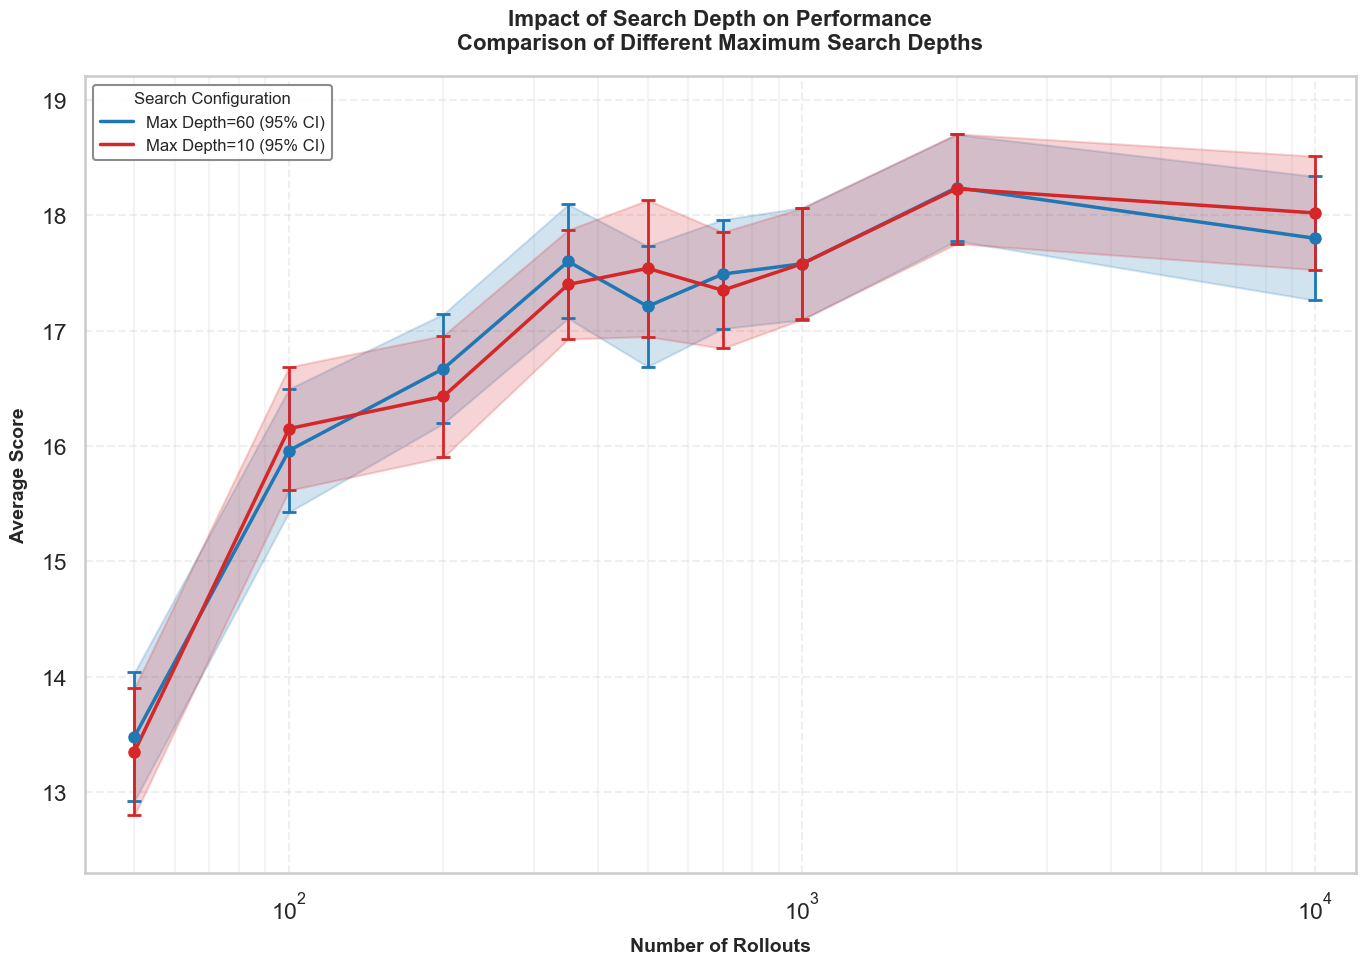

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import seaborn as sns


# Data
rollout_numbers = np.array([50, 100, 200, 350, 500, 700, 1000, 2000, 10000])
scores_depth60 = np.array([13.48, 15.96, 16.67, 17.6, 17.21, 17.49, 17.58, 18.24, 17.8])
se_depth60 = np.array([0.2837, 0.2727, 0.2421, 0.2519, 0.2666, 0.2410, 0.2483, 0.2350, 0.2739])
scores_depth10 = np.array([13.35, 16.15, 16.43, 17.4, 17.54, 17.35, 17.58, 18.23, 18.02])
se_depth10 = np.array([0.2819, 0.2729, 0.2692, 0.2412, 0.3018, 0.2574, 0.2454, 0.2428, 0.2510])

# Convert SE to 95% CI (multiply by 1.96 for normal distribution)
ci_depth60 = 1.96 * se_depth60
ci_depth10 = 1.96 * se_depth10

# Interpolation in log space
log_rollouts = np.log(rollout_numbers)
log_rollouts_fine = np.linspace(log_rollouts.min(), log_rollouts.max(), 500)
rollouts_fine = np.exp(log_rollouts_fine)

# Interpolate scores
spline_depth60 = make_interp_spline(log_rollouts, scores_depth60, k=1)
scores_depth60_smooth = spline_depth60(log_rollouts_fine)
spline_depth10 = make_interp_spline(log_rollouts, scores_depth10, k=1)
scores_depth10_smooth = spline_depth10(log_rollouts_fine)

# Compute confidence intervals
upper_depth60 = scores_depth60 + ci_depth60
lower_depth60 = scores_depth60 - ci_depth60
upper_depth10 = scores_depth10 + ci_depth10
lower_depth10 = scores_depth10 - ci_depth10

# Interpolate confidence intervals
spline_upper_depth60 = make_interp_spline(log_rollouts, upper_depth60, k=1)
spline_lower_depth60 = make_interp_spline(log_rollouts, lower_depth60, k=1)
upper_depth60_smooth = spline_upper_depth60(log_rollouts_fine)
lower_depth60_smooth = spline_lower_depth60(log_rollouts_fine)

spline_upper_depth10 = make_interp_spline(log_rollouts, upper_depth10, k=1)
spline_lower_depth10 = make_interp_spline(log_rollouts, lower_depth10, k=1)
upper_depth10_smooth = spline_upper_depth10(log_rollouts_fine)
lower_depth10_smooth = spline_lower_depth10(log_rollouts_fine)

# Create figure
plt.figure(figsize=(14, 10))

# Set the style for a professional look
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Plot confidence interval regions
plt.fill_between(rollouts_fine, lower_depth60_smooth, upper_depth60_smooth, alpha=0.2, color='#1f77b4')
plt.fill_between(rollouts_fine, lower_depth10_smooth, upper_depth10_smooth, alpha=0.2, color='#d62728')

# Plot interpolated lines
plt.plot(rollouts_fine, scores_depth60_smooth, label='Max Depth=60 (95% CI)', color='#1f77b4', linewidth=2.5)
plt.plot(rollouts_fine, scores_depth10_smooth, label='Max Depth=10 (95% CI)', color='#d62728', linewidth=2.5)

# Plot data points with error bars
plt.errorbar(rollout_numbers, scores_depth60, yerr=ci_depth60, fmt='o', capsize=5, color='#1f77b4', markersize=8, elinewidth=2, capthick=2)
plt.errorbar(rollout_numbers, scores_depth10, yerr=ci_depth10, fmt='o', capsize=5, color='#d62728', markersize=8, elinewidth=2, capthick=2)

# Customize axes
plt.xscale('log')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.xlabel('Number of Rollouts', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Average Score', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Impact of Search Depth on Performance\nComparison of Different Maximum Search Depths', fontsize=16, fontweight='bold', pad=20)

# Customize legend
plt.legend(title='Search Configuration', title_fontsize=12, fontsize=12, loc='upper left', frameon=True, framealpha=0.9, edgecolor='gray')

# Set axis limits with some padding
plt.xlim(40, 12000)
ymin = min(min(lower_depth60_smooth), min(lower_depth10_smooth)) - 0.5
ymax = max(max(upper_depth60_smooth), max(upper_depth10_smooth)) + 0.5
plt.ylim(ymin, ymax)

# Add grid but make it subtle
plt.grid(True, alpha=0.3, linestyle='--')

# Adjust layout
plt.tight_layout()
plt.show()

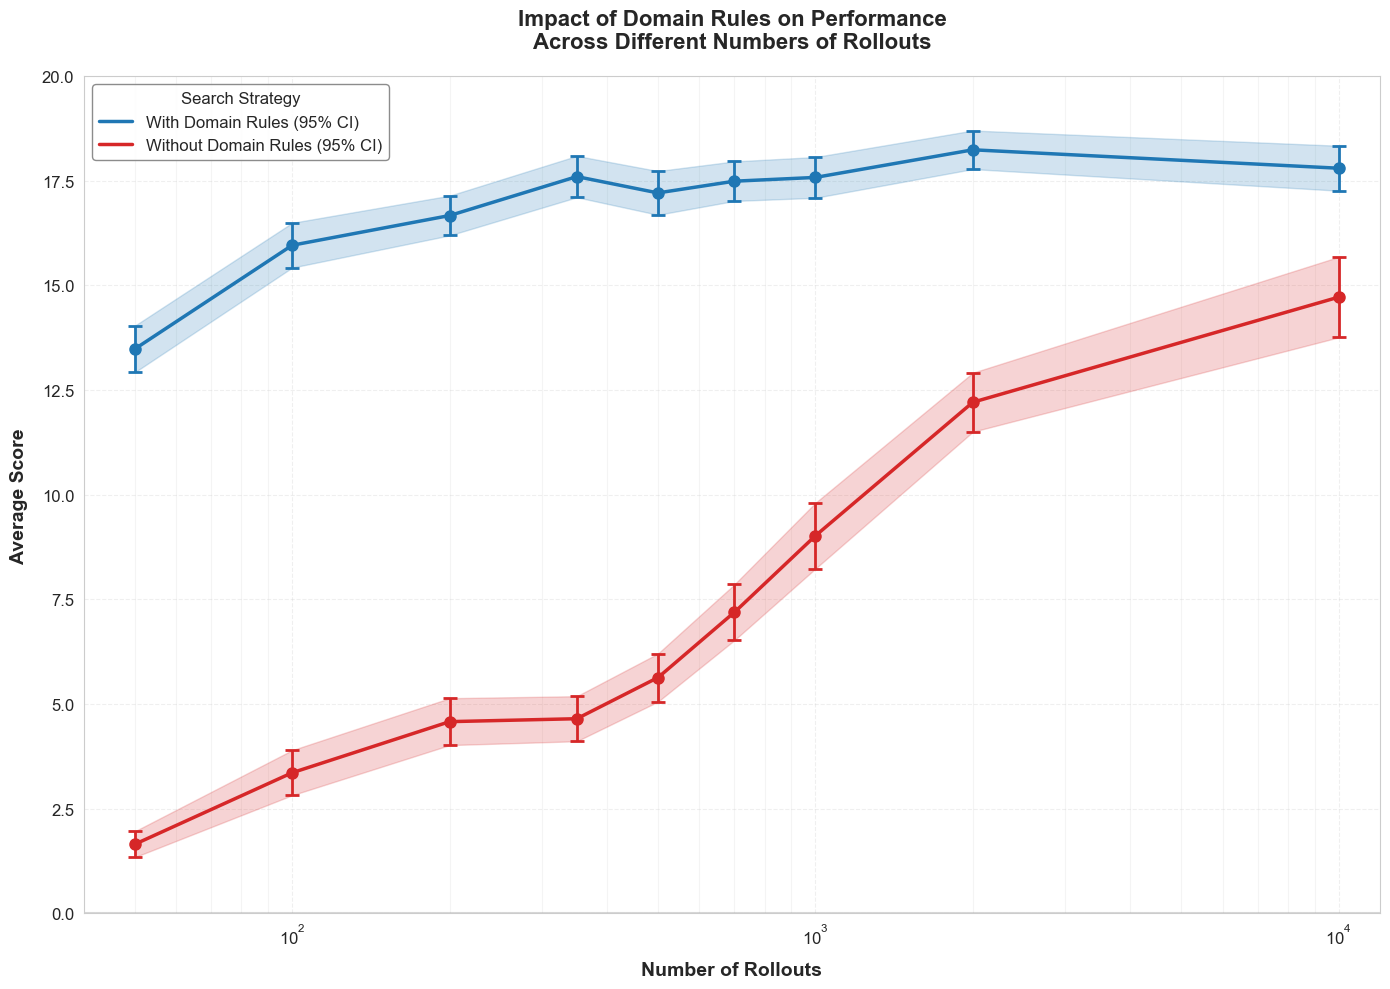

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import seaborn as sns


# Data
rollout_numbers = np.array([50, 100, 200, 350, 500, 700, 1000, 2000, 10000])

scores_with_rules = np.array([13.48, 15.96, 16.67, 17.6, 17.21, 17.49, 17.58, 18.24, 17.8])
se_with_rules = np.array([0.2837, 0.2727, 0.2421, 0.2519, 0.2666, 0.2410, 0.2483, 0.2350, 0.2739])

scores_without_rules = np.array([1.65, 3.36, 4.58, 4.65, 5.63, 7.19, 9.02, 12.21, 14.72])
se_without_rules = np.array([0.1577, 0.2744, 0.2857, 0.2744, 0.2931, 0.3399, 0.4010, 0.3595, 0.4901])

# Convert SE to 95% CI
ci_with_rules = 1.96 * se_with_rules
ci_without_rules = 1.96 * se_without_rules

# Interpolation in log space
log_rollouts = np.log(rollout_numbers)
log_rollouts_fine = np.linspace(log_rollouts.min(), log_rollouts.max(), 500)
rollouts_fine = np.exp(log_rollouts_fine)

# Interpolate scores
spline_with_rules = make_interp_spline(log_rollouts, scores_with_rules, k=1)
scores_with_rules_smooth = spline_with_rules(log_rollouts_fine)
spline_without_rules = make_interp_spline(log_rollouts, scores_without_rules, k=1)
scores_without_rules_smooth = spline_without_rules(log_rollouts_fine)

# Compute confidence intervals
upper_with_rules = scores_with_rules + ci_with_rules
lower_with_rules = scores_with_rules - ci_with_rules
upper_without_rules = scores_without_rules + ci_without_rules
lower_without_rules = scores_without_rules - ci_without_rules

# Interpolate confidence intervals
spline_upper_with_rules = make_interp_spline(log_rollouts, upper_with_rules, k=1)
spline_lower_with_rules = make_interp_spline(log_rollouts, lower_with_rules, k=1)
upper_with_rules_smooth = spline_upper_with_rules(log_rollouts_fine)
lower_with_rules_smooth = spline_lower_with_rules(log_rollouts_fine)

spline_upper_without_rules = make_interp_spline(log_rollouts, upper_without_rules, k=1)
spline_lower_without_rules = make_interp_spline(log_rollouts, lower_without_rules, k=1)
upper_without_rules_smooth = spline_upper_without_rules(log_rollouts_fine)
lower_without_rules_smooth = spline_lower_without_rules(log_rollouts_fine)

# Create figure
plt.figure(figsize=(14, 10))

# Set the style for a professional look
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Plot confidence interval regions
plt.fill_between(rollouts_fine, lower_with_rules_smooth, upper_with_rules_smooth, alpha=0.2, color='#1f77b4')
plt.fill_between(rollouts_fine, lower_without_rules_smooth, upper_without_rules_smooth, alpha=0.2, color='#d62728')

# Plot interpolated lines
plt.plot(rollouts_fine, scores_with_rules_smooth, label='With Domain Rules (95% CI)', color='#1f77b4', linewidth=2.5)
plt.plot(rollouts_fine, scores_without_rules_smooth, label='Without Domain Rules (95% CI)', color='#d62728', linewidth=2.5)

# Plot data points with error bars
plt.errorbar(rollout_numbers, scores_with_rules, yerr=ci_with_rules, fmt='o', capsize=5, color='#1f77b4', markersize=8, elinewidth=2, capthick=2)
plt.errorbar(rollout_numbers, scores_without_rules, yerr=ci_without_rules, fmt='o', capsize=5, color='#d62728', markersize=8, elinewidth=2, capthick=2)

# Customize axes
plt.xscale('log')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.xlabel('Number of Rollouts', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Average Score', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Impact of Domain Rules on Performance\nAcross Different Numbers of Rollouts', fontsize=16, fontweight='bold', pad=20)

# Set y-axis limits to highlight the difference
plt.ylim(0, 20)

# Add horizontal lines for context
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# Customize legend
plt.legend(title='Search Strategy', title_fontsize=12, fontsize=12, loc='upper left', frameon=True, framealpha=0.9, edgecolor='gray')

# Set x-axis limits with some padding
plt.xlim(40, 12000)

# Add grid but make it subtle
plt.grid(True, alpha=0.3, linestyle='--')

# Add tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [3]:
import json
import os
from typing import List, Tuple

# Initialize moves list - moved outside to be reused
moves = [
    {'action_type': 'DISCARD', 'card_index': 0},
    {'action_type': 'DISCARD', 'card_index': 1},
    {'action_type': 'DISCARD', 'card_index': 2},
    {'action_type': 'DISCARD', 'card_index': 3},
    {'action_type': 'DISCARD', 'card_index': 4},
    {'action_type': 'PLAY', 'card_index': 0},
    {'action_type': 'PLAY', 'card_index': 1},
    {'action_type': 'PLAY', 'card_index': 2},
    {'action_type': 'PLAY', 'card_index': 3},
    {'action_type': 'PLAY', 'card_index': 4},
    {'action_type': 'REVEAL_COLOR', 'target_offset': 1, 'color': 'R'},
    {'action_type': 'REVEAL_COLOR', 'target_offset': 1, 'color': 'Y'},
    {'action_type': 'REVEAL_COLOR', 'target_offset': 1, 'color': 'G'},
    {'action_type': 'REVEAL_COLOR', 'target_offset': 1, 'color': 'W'},
    {'action_type': 'REVEAL_COLOR', 'target_offset': 1, 'color': 'B'},
    {'action_type': 'REVEAL_RANK', 'target_offset': 1, 'rank': 0},
    {'action_type': 'REVEAL_RANK', 'target_offset': 1, 'rank': 1},
    {'action_type': 'REVEAL_RANK', 'target_offset': 1, 'rank': 2},
    {'action_type': 'REVEAL_RANK', 'target_offset': 1, 'rank': 3},
    {'action_type': 'REVEAL_RANK', 'target_offset': 1, 'rank': 4}
]

# Pre-compile move descriptions for reuse
MOVE_DESCRIPTIONS = {}
for i, move in enumerate(moves):
    if move['action_type'] in ['DISCARD', 'PLAY']:
        MOVE_DESCRIPTIONS[i] = f"{move['action_type']} card {move['card_index'] + 1}"
    elif move['action_type'] == 'REVEAL_COLOR':
        MOVE_DESCRIPTIONS[i] = f"Reveal {move['color']} to P{move['target_offset']}"
    elif move['action_type'] == 'REVEAL_RANK':
        MOVE_DESCRIPTIONS[i] = f"Reveal {move['rank'] + 1} to P{move['target_offset']}"
    else:
        MOVE_DESCRIPTIONS[i] = f"Unknown: {move['action_type']}"

def process_game_states(data: List[Tuple]) -> None:
    """Process MCTS game states and write to output file efficiently."""
    os.makedirs("policies", exist_ok=True)
    
    with open('policies/mcts_50.md', 'w') as output_file:
        for idx, (encoded_obs_list, policy_list, final_score) in enumerate(data):
            game_state_str = reconstruct_game_state(encoded_obs_list)
            
            # Calculate max probability and index
            max_prob = max(policy_list)
            max_prob_indices = [i for i, prob in enumerate(policy_list) if prob == max_prob]
            
            # Write header and game state
            output_file.write(f"# Game State {idx+1}\n\n")
            output_file.write("## Game State\n")
            output_file.write(f"```\n{game_state_str}\n```\n\n")
            output_file.write("## MCTS Policy\n\n")
            output_file.write("|      Action       | Probability | Selected |\n")
            output_file.write("|:-----------------:|:-----------:|:--------:|\n")
            
            # Process moves with non-zero probability
            for i, prob in enumerate(policy_list):
                if prob > 0:
                    move_desc = f"{MOVE_DESCRIPTIONS[i]:<17}"
                    marker = "★" if i in max_prob_indices else ""
                    marker = f"{marker:^10}"
                    output_file.write(f"| {move_desc} |    {prob:.3f}    |{marker}|\n")
            
            output_file.write(f"\nFinal Score: {final_score:.3f}\n")
            output_file.write("\n---\n\n")

# Main execution
if __name__ == "__main__":
    data = []
    # Read and parse data from JSONL file using a buffer
    with open('policies/mcts.jsonl', 'r', buffering=1024*1024) as file:  # 1MB buffer
        for line in file:
            json_data = json.loads(line)
            data.extend((tuple_data[0], tuple_data[1], tuple_data[2]) for tuple_data in json_data)
    
    process_game_states(data)
    print("Analysis complete! Results saved in 'policies/mcts_50.md'")

Analysis complete! Results saved in 'policies/mcts_50.md'


# **AlphaZero**

In [4]:
def reconstruct_game_state(encoded_obs):
    # Define game parameters
    num_colors = 5   # R, Y, G, W, B
    num_ranks = 5    # 1 to 5
    num_players = 2
    hand_size = 5
    bits_per_card = num_colors * num_ranks  # 25
    max_deck_size = 50
    max_information_tokens = 8
    max_life_tokens = 3

    # Helper functions
    def card_index(color, rank):
        return color * num_ranks + rank

    def get_color_rank_from_index(index):
        color = index // num_ranks
        rank = index % num_ranks
        return color, rank

    colors = ['R', 'Y', 'G', 'W', 'B']
    ranks = ['1', '2', '3', '4', '5']

    # Initialize offsets
    offset = 0
    encoding = encoded_obs

    # --- Hands Section ---
    hands_section_length = (num_players - 1) * hand_size * bits_per_card + num_players
    hands = []
    hand_sizes = [hand_size] * num_players  # Initialize hand sizes for all players

    # Other players' hands
    for player in range(1, num_players):
        player_hand = []
        num_cards_in_hand = hand_size
        for card_idx in range(num_cards_in_hand):
            card_offset = offset + card_idx * bits_per_card
            card_bits = encoding[card_offset:card_offset + bits_per_card]
            if any(card_bits):
                card_pos = card_bits.index(1)
                color_idx, rank_idx = get_color_rank_from_index(card_pos)
                card_str = f"{colors[color_idx]}{ranks[rank_idx]}"
            else:
                card_str = "XX"
            player_hand.append(card_str)
        hands.append(player_hand)

    offset += (num_players - 1) * hand_size * bits_per_card

    # Missing card indicators
    missing_card_bits = encoding[offset:offset + num_players]
    missing_cards = [bool(bit) for bit in missing_card_bits]
    offset += num_players

    # Adjust hand sizes based on missing cards
    for idx, missing in enumerate(missing_cards):
        if missing:
            hand_sizes[idx] -= 1  # Assume one card is missing

    # --- Board Section ---
    # Deck size (thermometer encoding)
    deck_size_bits = encoding[offset:offset + (max_deck_size - num_players * hand_size)]
    deck_size = sum(deck_size_bits)
    offset += (max_deck_size - num_players * hand_size)

    # Fireworks
    fireworks = []
    for color_idx in range(num_colors):
        firework_bits = encoding[offset:offset + num_ranks]
        if any(firework_bits):
            highest_rank = firework_bits.index(1) + 1  # Ranks are 1-indexed
        else:
            highest_rank = 0
        fireworks.append(f"{colors[color_idx]}{highest_rank}")
        offset += num_ranks

    # Information tokens (thermometer encoding)
    info_token_bits = encoding[offset:offset + max_information_tokens]
    info_tokens = sum(info_token_bits)
    offset += max_information_tokens

    # Life tokens (thermometer encoding)
    life_token_bits = encoding[offset:offset + max_life_tokens]
    life_tokens = sum(life_token_bits)
    offset += max_life_tokens

    # --- Discards Section ---
    discard_bits = encoding[offset:offset + max_deck_size]
    offset += max_deck_size

    # Reconstruct discard pile
    discards = []
    idx_in_discard = 0
    for color_idx in range(num_colors):
        for rank_idx in range(num_ranks):
            num_instances = 0
            if rank_idx == 0:
                num_instances = 3
            elif rank_idx == 4:
                num_instances = 1
            else:
                num_instances = 2
            for i in range(num_instances):
                if discard_bits[idx_in_discard] == 1:
                    discards.append(f"{colors[color_idx]}{ranks[rank_idx]}")
                idx_in_discard += 1

    # --- Last Action Section ---
    last_action_section_length = (
        num_players + 4 + num_players + num_colors + num_ranks +
        hand_size + hand_size + bits_per_card + 2
    )
    offset += last_action_section_length

    # --- Card Knowledge Section ---
    card_knowledge_section_length = num_players * hand_size * (bits_per_card + num_colors + num_ranks)
    card_knowledge = []

    for player in range(num_players):
        player_card_knowledge = []
        num_cards_in_hand = hand_sizes[player]
        for card_idx in range(hand_size):
            if card_idx >= num_cards_in_hand:
                # Skip missing cards
                offset += bits_per_card + num_colors + num_ranks
                continue

            # Plausible cards
            plausible_cards_bits = encoding[offset:offset + bits_per_card]
            offset += bits_per_card

            # Revealed colors
            revealed_color_bits = encoding[offset:offset + num_colors]
            offset += num_colors

            # Revealed ranks
            revealed_rank_bits = encoding[offset:offset + num_ranks]
            offset += num_ranks

            # Determine plausible colors and ranks
            plausible_colors = set()
            plausible_ranks = set()
            for idx_pc, bit in enumerate(plausible_cards_bits):
                if bit == 1:
                    color_idx, rank_idx = get_color_rank_from_index(idx_pc)
                    plausible_colors.add(colors[color_idx])
                    plausible_ranks.add(ranks[rank_idx])

            # Determine explicitly revealed colors and ranks
            revealed_colors = [colors[i] for i, bit in enumerate(revealed_color_bits) if bit == 1]
            revealed_ranks = [ranks[i] for i, bit in enumerate(revealed_rank_bits) if bit == 1]

            card_knowledge_entry = {
                'plausible_colors': plausible_colors,
                'plausible_ranks': plausible_ranks,
                'revealed_colors': revealed_colors,
                'revealed_ranks': revealed_ranks,
            }
            player_card_knowledge.append(card_knowledge_entry)

        card_knowledge.append(player_card_knowledge)

    # --- Construct Output String ---
    output = []

    output.append(f"Information Tokens: {info_tokens}")
    output.append(f"Life Tokens: {life_tokens}")
    output.append("Fireworks: " + ' '.join(fireworks))
    output.append(f"Deck size: {deck_size}")
    output.append("Discards:")
    if discards:
        output.append(' '.join(discards))
    else:
        output.append("None")

    output.append("\nHands:")
    # Your hand with card knowledge
    output.append("Your hand:")
    your_hand_str = []
    for card_idx in range(hand_size):
        if card_idx >= len(card_knowledge[0]):
            continue  # Skip missing cards

        card_knowledge_entry = card_knowledge[0][card_idx]  # Our own hand is player 0

        # Determine known color and rank
        known_color = 'X'
        if len(card_knowledge_entry['revealed_colors']) == 1:
            known_color = card_knowledge_entry['revealed_colors'][0]

        known_rank = 'X'
        if len(card_knowledge_entry['revealed_ranks']) == 1:
            known_rank = card_knowledge_entry['revealed_ranks'][0]

        # Build plausible colors and ranks strings
        plausible_colors_str = ''.join(sorted(card_knowledge_entry['plausible_colors'], key=lambda x: colors.index(x)))
        plausible_ranks_str = ''.join(sorted(card_knowledge_entry['plausible_ranks'], key=lambda x: ranks.index(x)))

        # If no plausible colors or ranks, show all
        if not plausible_colors_str:
            plausible_colors_str = ''.join(colors)
        if not plausible_ranks_str:
            plausible_ranks_str = ''.join(ranks)

        # Format the card knowledge as per your requirement
        card_str = f"{known_color}{known_rank} || {plausible_colors_str}{plausible_ranks_str}"
        your_hand_str.append(card_str)

    output.extend(your_hand_str)

    # Other player's hand
    output.append("\nOther player's hand:")
    other_hand = hands[0]
    other_hand_str = ' '.join(other_hand)
    if missing_cards[1]:
        other_hand_str += " (missing cards)"
    output.append(other_hand_str)

    # Return the output string
    return '\n'.join(output)

In [ ]:
import json
import os
from typing import List, Tuple
from itertools import compress

# Initialize moves list - moved outside to be reused
moves = [
    {'action_type': 'DISCARD', 'card_index': 0},
    {'action_type': 'DISCARD', 'card_index': 1},
    {'action_type': 'DISCARD', 'card_index': 2},
    {'action_type': 'DISCARD', 'card_index': 3},
    {'action_type': 'DISCARD', 'card_index': 4},
    {'action_type': 'PLAY', 'card_index': 0},
    {'action_type': 'PLAY', 'card_index': 1},
    {'action_type': 'PLAY', 'card_index': 2},
    {'action_type': 'PLAY', 'card_index': 3},
    {'action_type': 'PLAY', 'card_index': 4},
    {'action_type': 'REVEAL_COLOR', 'target_offset': 1, 'color': 'R'},
    {'action_type': 'REVEAL_COLOR', 'target_offset': 1, 'color': 'Y'},
    {'action_type': 'REVEAL_COLOR', 'target_offset': 1, 'color': 'G'},
    {'action_type': 'REVEAL_COLOR', 'target_offset': 1, 'color': 'W'},
    {'action_type': 'REVEAL_COLOR', 'target_offset': 1, 'color': 'B'},
    {'action_type': 'REVEAL_RANK', 'target_offset': 1, 'rank': 0},
    {'action_type': 'REVEAL_RANK', 'target_offset': 1, 'rank': 1},
    {'action_type': 'REVEAL_RANK', 'target_offset': 1, 'rank': 2},
    {'action_type': 'REVEAL_RANK', 'target_offset': 1, 'rank': 3},
    {'action_type': 'REVEAL_RANK', 'target_offset': 1, 'rank': 4}
]

# Pre-compile move descriptions for reuse
MOVE_DESCRIPTIONS = {}
for i, move in enumerate(moves):
    if move['action_type'] in ['DISCARD', 'PLAY']:
        MOVE_DESCRIPTIONS[i] = f"{move['action_type']} card {move['card_index'] + 1}"
    elif move['action_type'] == 'REVEAL_COLOR':
        MOVE_DESCRIPTIONS[i] = f"Reveal {move['color']} to P{move['target_offset']}"
    elif move['action_type'] == 'REVEAL_RANK':
        MOVE_DESCRIPTIONS[i] = f"Reveal {move['rank'] + 1} to P{move['target_offset']}"
    else:
        MOVE_DESCRIPTIONS[i] = f"Unknown: {move['action_type']}"

def process_game_states(data: List[Tuple]) -> None:
    """Process game states and write to output file efficiently."""
    os.makedirs("policies", exist_ok=True)
    
    with open('policies/alphazero_pv.md', 'w') as output_file:
        for idx, (encoded_obs_list, policy_list, value_outcome, root_policy_list) in enumerate(data):
            game_state_str = reconstruct_game_state(encoded_obs_list)
            
            # Calculate max probabilities and indices in one pass
            max_prob = max(policy_list)
            max_root_prob = max(root_policy_list)
            max_prob_mask = [prob == max_prob for prob in policy_list]
            max_root_prob_mask = [prob == max_root_prob for prob in root_policy_list]
            
            # Write header and game state
            output_file.write(f"# Game State {idx+1}\n\n")
            output_file.write("## Game State\n")
            output_file.write(f"```\n{game_state_str}\n```\n\n")
            output_file.write("## Available Actions\n\n")
            output_file.write("|      Action       | MCTS  | Network | Selected |\n")
            output_file.write("|:-----------------:|:-----:|:-------:|:--------:|\n")
            
            # Process moves in a single pass
            for i, (prob, root_prob) in enumerate(zip(policy_list, root_policy_list)):
                if prob > 0 or root_prob > 0 or max_prob_mask[i] or max_root_prob_mask[i]:
                    move_desc = f"{MOVE_DESCRIPTIONS[i]:<17}"
                    
                    # Determine marker more efficiently
                    if max_prob_mask[i] and max_root_prob_mask[i]:
                        marker = "★"
                    elif max_prob_mask[i]:
                        marker = "M"
                    elif max_root_prob_mask[i]:
                        marker = "R"
                    else:
                        marker = ""
                    
                    marker = f"{marker:^10}"
                    output_file.write(f"| {move_desc} | {prob:.3f} | {root_prob:.3f}   |{marker}|\n")
            
            output_file.write(f"\nValue: {value_outcome:.3f}\n")
            output_file.write("\n---\n\n")

# Main execution
if __name__ == "__main__":
    data = []
    # Read and parse data from JSONL file using a buffer
    with open('policies/alphazero.jsonl', 'r', buffering=1024*1024) as file:  # 1MB buffer
        for line in file:
            json_data = json.loads(line)
            data.extend((tuple_data[0], tuple_data[1], tuple_data[2], tuple_data[3]) for tuple_data in json_data)
    
    process_game_states(data)
    print("Analysis complete! Results saved in 'policies/alphazero_pv.md'")

Analysis complete! Results saved in 'policies/alphazero_100.md'


In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from typing import Dict, List, Tuple
import torch.nn.functional as F
from scipy import stats

class SimpleNetwork(nn.Module):
    def __init__(self, num_actions, obs_shape, hidden_sizes=[512, 256, 256]):
        super(SimpleNetwork, self).__init__()
        
        # Improved shared backbone
        backbone_layers = []
        prev_size = obs_shape
        
        for hidden_size in hidden_sizes:
            backbone_layers.extend([
                nn.Linear(prev_size, hidden_size),
                nn.GELU(),
            ])
            prev_size = hidden_size
            
        self.backbone = nn.Sequential(*backbone_layers)
        
        # Policy head
        self.policy_head = nn.Sequential(
            nn.Linear(hidden_sizes[-1], hidden_sizes[-1]),
            nn.GELU(),
            nn.Linear(hidden_sizes[-1], num_actions)
        )
        
        # Value head
        self.value_head = nn.Sequential(
            nn.Linear(hidden_sizes[-1], hidden_sizes[-1] // 2),
            nn.GELU(),
            nn.Linear(hidden_sizes[-1] // 2, 1),
            nn.Tanh()  # Bound values between -1 and 1
        )
        
        # Initialize weights
        self._init_weights()
    
    def _init_weights(self):
        """Initialize weights using He initialization"""
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.kaiming_normal_(module.weight, nonlinearity='relu')
                if module.bias is not None:
                    nn.init.zeros_(module.bias)
    
    def forward(self, x):
        shared_features = self.backbone(x)
        policy_logits = self.policy_head(shared_features)
        value = self.value_head(shared_features)
        return policy_logits, value

def load_model(model_path: str, obs_shape: int = 658, num_actions: int = 20) -> nn.Module:
    """Load the trained model."""
    model = SimpleNetwork(num_actions=num_actions, obs_shape=obs_shape)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    return model

def get_weight_stats(model: nn.Module) -> Dict[str, Dict[str, float]]:
    """Get statistics about the weights in each layer."""
    stats = {}
    for name, param in model.named_parameters():
        if 'weight' in name:
            stats[name] = {
                'mean': float(param.data.mean()),
                'std': float(param.data.std()),
                'median': float(param.data.median()),
                'zero_ratio': float((param.data.abs() < 1e-5).float().mean()),
                'l2_norm': float(param.data.norm(2)),
            }
    return stats

def compute_losses(model: nn.Module, dummy_input: torch.Tensor, 
                  weight_decay: float = 1e-4) -> Dict[str, float]:
    """Compute policy, value, and regularization losses."""
    # Create dummy targets
    batch_size = dummy_input.size(0)
    dummy_policy = torch.ones(batch_size, model.policy_head[-1].out_features) / \
                  model.policy_head[-1].out_features
    dummy_values = torch.randn(batch_size, 1)  # Random values between -1 and 1
    dummy_values = torch.tanh(dummy_values)  # Ensure values are in [-1, 1]
    
    # Forward pass
    policy_logits, predicted_values = model(dummy_input)
    
    # Policy loss
    policy_log_probs = F.log_softmax(policy_logits, dim=1)
    policy_loss = -torch.mean(torch.sum(dummy_policy * policy_log_probs, dim=1))
    
    # Value loss
    value_loss = F.mse_loss(predicted_values, dummy_values)
    
    # Regularization loss
    reg_loss = 0
    for param in model.parameters():
        reg_loss += (param ** 2).sum()
    reg_loss *= weight_decay / 2
    
    return {
        'policy_loss': float(policy_loss),
        'value_loss': float(value_loss),
        'reg_loss': float(reg_loss),
        'total_loss': float(policy_loss + value_loss + reg_loss)
    }

def plot_weight_distributions(model: nn.Module, save_path: str = None):
    """Create plots for both policy and value head weights."""
    sns.set_theme(style='whitegrid')
    
    # Separate weights by network component
    component_data = {
        'Backbone': [],
        'Policy Head': [],
        'Value Head': []
    }
    
    for name, param in model.named_parameters():
        if 'weight' not in name:
            continue
            
        weights = param.data.cpu().numpy().flatten()
        if 'policy_head' in name:
            component = 'Policy Head'
        elif 'value_head' in name:
            component = 'Value Head'
        else:
            component = 'Backbone'
            
        clean_name = name.replace('.weight', '').replace('_', ' ').title()
        
        # Calculate statistics
        stats_dict = {
            'name': clean_name,
            'weights': weights,
            'mean': np.mean(weights),
            'median': np.median(weights),
            'std': np.std(weights),
            'skew': stats.skew(weights),
            'kurtosis': stats.kurtosis(weights),
            'zero_ratio': np.mean(np.abs(weights) < 1e-5) * 100,
            'l2_norm': np.sqrt(np.sum(weights ** 2)),
            'q1': np.percentile(weights, 25),
            'q3': np.percentile(weights, 75),
            'min': np.min(weights),
            'max': np.max(weights)
        }
        stats_dict['iqr'] = stats_dict['q3'] - stats_dict['q1']
        
        component_data[component].append(stats_dict)
    
    # Create figure with subplots
    fig = plt.figure(figsize=(20, 15))
    gs = plt.GridSpec(3, 2, height_ratios=[2, 2, 1], hspace=0.4, wspace=0.3)
    
    # Plot distributions for each component
    for idx, (component, data) in enumerate(component_data.items()):
        if not data:  # Skip if no data for component
            continue
            
        ax = fig.add_subplot(gs[idx, 0])
        
        # Violin plots
        parts = ax.violinplot([d['weights'] for d in data],
                            showmeans=True, showextrema=True)
        
        # Customize violin plot
        colors = {'Backbone': '#3498db', 'Policy Head': '#e74c3c', 'Value Head': '#2ecc71'}
        for pc in parts['bodies']:
            pc.set_facecolor(colors[component])
            pc.set_alpha(0.7)
            
        # Add labels and title
        ax.set_xticks(range(1, len(data) + 1))
        ax.set_xticklabels([d['name'] for d in data], rotation=45, ha='right')
        ax.set_title(f'{component} Weight Distribution', pad=20, fontsize=12)
        
        # Add statistics table
        ax_stats = fig.add_subplot(gs[idx, 1])
        cell_text = [[f"{d[stat]:.3f}" for d in data] 
                    for stat in ['mean', 'std', 'zero_ratio', 'l2_norm']]
        
        table = ax_stats.table(cellText=cell_text,
                             rowLabels=['Mean', 'Std Dev', 'Zero Weights (%)', 'L2 Norm'],
                             colLabels=[d['name'] for d in data],
                             cellLoc='center',
                             loc='center',
                             bbox=[0.1, 0.1, 0.9, 0.9])
        
        table.auto_set_font_size(False)
        table.set_fontsize(8)
        ax_stats.axis('off')
        ax_stats.set_title(f'{component} Statistics', pad=20, fontsize=12)
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        
    plt.show()

def analyze_network(model_path: str, obs_shape: int = 658, 
                   num_actions: int = 20, weight_decay: float = 1e-4):
    """Main analysis function for the network with both policy and value heads."""
    # Load model
    model = load_model(model_path, obs_shape, num_actions)
    model.eval()
    
    # Get weight statistics
    weight_stats = get_weight_stats(model)
    
    # Create dummy input
    dummy_input = torch.randn(32, obs_shape)
    
    # Compute losses
    losses = compute_losses(model, dummy_input, weight_decay)
    
    # Print analysis
    print("\n=== Weight Statistics ===")
    for layer_name, stats in weight_stats.items():
        print(f"\n{layer_name}:")
        for stat_name, value in stats.items():
            print(f"  {stat_name}: {value:.6f}")
    
    print("\n=== Loss Analysis ===")
    print(f"Policy Loss: {losses['policy_loss']:.6f}")
    print(f"Value Loss: {losses['value_loss']:.6f}")
    print(f"Regularization Loss: {losses['reg_loss']:.6f}")
    print(f"Total Loss: {losses['total_loss']:.6f}")
    
    # Loss ratios
    policy_ratio = losses['policy_loss'] / losses['total_loss']
    value_ratio = losses['value_loss'] / losses['total_loss']
    reg_ratio = losses['reg_loss'] / losses['total_loss']
    
    print("\n=== Loss Contributions ===")
    print(f"Policy Loss Contribution: {policy_ratio:.2%}")
    print(f"Value Loss Contribution: {value_ratio:.2%}")
    print(f"Regularization Loss Contribution: {reg_ratio:.2%}")
    
    # Plot distributions
    plot_weight_distributions(model)
    
    # Analysis interpretation
    print("\n=== Network Analysis ===")
    if value_ratio > 0.5:
        print("WARNING: Value loss dominates the total loss. Consider rebalancing loss terms.")
    if reg_ratio > 0.3:
        print("WARNING: High regularization loss. Consider reducing weight decay.")
    
    # Check for dead neurons in each head
    zero_weights = {name: stats['zero_ratio'] for name, stats in weight_stats.items()}
    for name, ratio in zero_weights.items():
        if ratio > 0.1:
            print(f"\nWARNING: High proportion of zero weights ({ratio:.1%}) in {name}")


=== Weight Statistics ===

backbone.0.weight:
  mean: -0.000207
  std: 0.055160
  median: -0.000142
  zero_ratio: 0.000154
  l2_norm: 32.016453

backbone.2.weight:
  mean: 0.000107
  std: 0.062522
  median: 0.000074
  zero_ratio: 0.000183
  l2_norm: 22.635347

backbone.4.weight:
  mean: 0.000596
  std: 0.088371
  median: 0.000079
  zero_ratio: 0.000061
  l2_norm: 22.623226

policy_head.0.weight:
  mean: 0.000127
  std: 0.088448
  median: 0.000165
  zero_ratio: 0.000061
  l2_norm: 22.642658

policy_head.2.weight:
  mean: -0.000597
  std: 0.087106
  median: -0.001800
  zero_ratio: 0.000000
  l2_norm: 6.232305

value_head.0.weight:
  mean: -0.000625
  std: 0.088499
  median: -0.000576
  zero_ratio: 0.000092
  l2_norm: 16.020267

value_head.2.weight:
  mean: 0.003303
  std: 0.121990
  median: 0.009669
  zero_ratio: 0.000000
  l2_norm: 1.375267

=== Loss Analysis ===
Policy Loss: 3.860348
Value Loss: 0.703079
Regularization Loss: 0.142965
Total Loss: 4.706392

=== Loss Contributions ===
Po

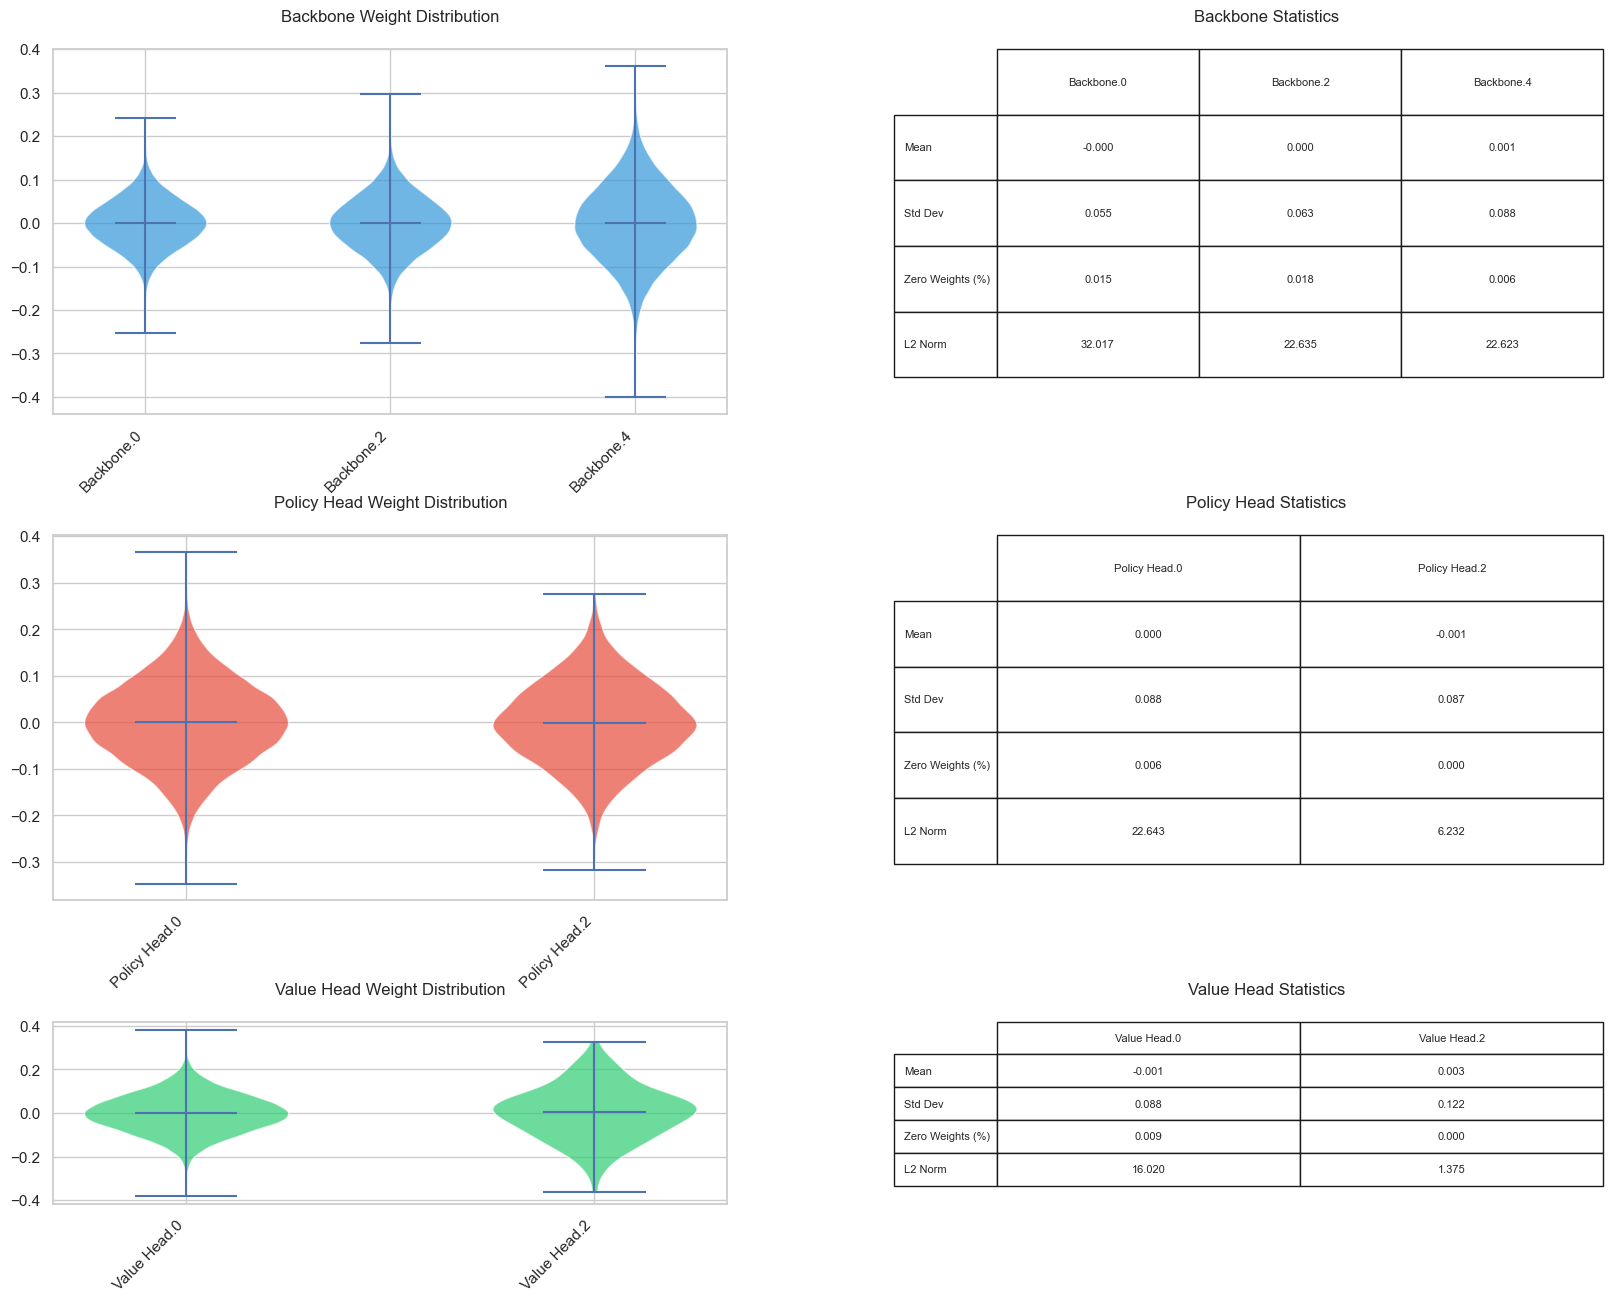


=== Network Analysis ===


In [6]:
# Analyze your model
analyze_network(
    model_path='../saved_models/policy_model_100.pth',
    obs_shape=658,
    num_actions=20,
    weight_decay=1e-4
)